In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
from datetime import datetime
import time
import math
from IPython.display import clear_output

In [2]:
data = json.load(open('logins.json'))

In [3]:
lgin_data = pd.read_json('logins.json')

In [4]:
lgin_data.head(-10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [5]:
lgin_data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


__PART 1 - EXPLORATORY DATA ANALYSIS__

Aggregate these login counts based on 15 minute time intervals and visualize and describe the resultiung time series of login counts in ways that best characterize the underliying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 


In [6]:
type(lgin_data['login_time'][0])

pandas._libs.tslib.Timestamp

In [7]:
#Using the range of the first and last timestamps, create 15 minutes intervals
rans = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')

In [8]:
#Create a series that counts the logins in each segment
counts = pd.DataFrame({ 'dates':rans, 'counts':np.zeros(len(rans))},)

In [9]:
print(counts.shape)
counts.head()

(9789, 2)


,counts,dates
0,0.0,1970-01-01 20:00:00
1,0.0,1970-01-01 20:15:00
2,0.0,1970-01-01 20:30:00
3,0.0,1970-01-01 20:45:00
4,0.0,1970-01-01 21:00:00


In [10]:
lgin_data = lgin_data.sort_values('login_time')

lgin_data = lgin_data.reset_index(drop=True)


In [11]:
lgin_data.head(10)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
5,1970-01-01 20:21:41
6,1970-01-01 20:26:05
7,1970-01-01 20:26:21
8,1970-01-01 20:31:03
9,1970-01-01 20:34:46


In [ ]:
#Create a series that counts the logins in each segment
counts = pd.DataFrame({ 'dates':rans, 'counts':np.zeros(len(rans))},)

start_time_inc = datetime.strptime(str(counts.dates[0]), "%Y-%m-%d %H:%M:%S")
start_time_com = time.mktime(start_time_inc.timetuple())

delta_15m = 15 * 60
display = 0

for time_log in lgin_data['login_time']:
    #print(counts.index[cter] < time_log < counts.index[cter+1], '\n', time_log)
    d_conv = datetime.strptime(str(time_log), "%Y-%m-%d %H:%M:%S")
    current_time = time.mktime(d_conv.timetuple())
    time_loc = current_time - start_time_com
    cter = math.floor(time_loc/delta_15m)
    counts['counts'].loc[cter] = counts['counts'].loc[cter] + 1
    display+=1
    clear_output(wait=True)
    print(len(lgin_data)-display)


88127


In [13]:
p = 0 
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng)
for i in range(len(lgin_data)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = lgin_data['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

In [35]:
counts= pd.DataFrame(ts, columns = ['counts'])
counts.index.name = 'dates'
ts.head()

dates
1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [36]:
counts.iloc[96]
counts.head(10)

,counts
dates,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


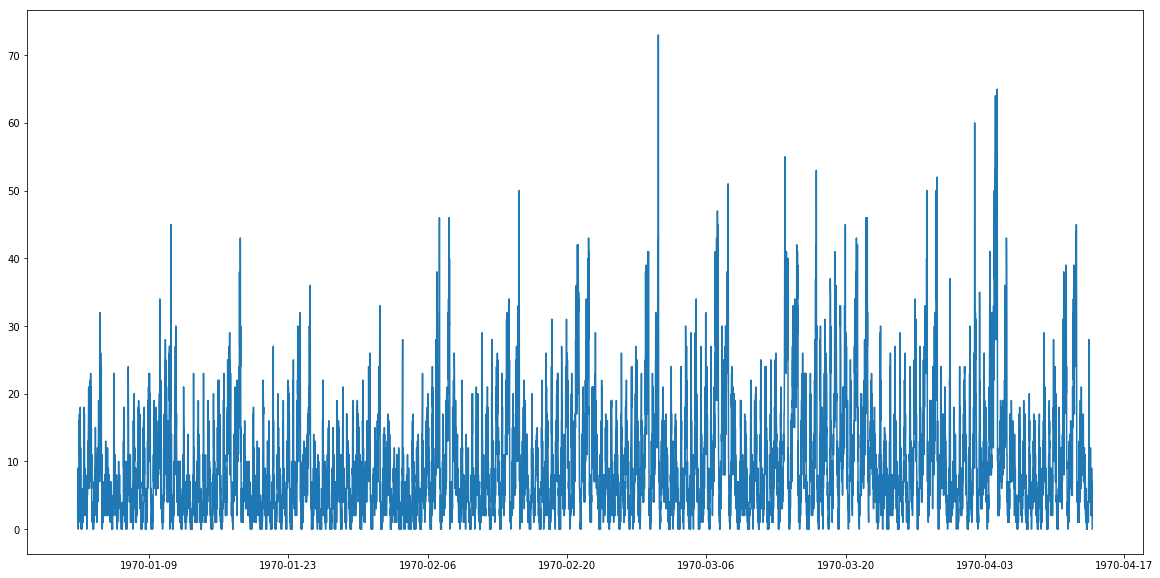

In [37]:
plt.figure(figsize=(20,10))
plt.plot(counts['counts'])
#counts.plot()
plt.show()

Looking at all the counts data plotted, I would say there is some periodic behavior. It seems like there is likely a peak during the day, another peak at a certain point in the week and all of the maximums are affected by seasonal factors or changes from month to month. 

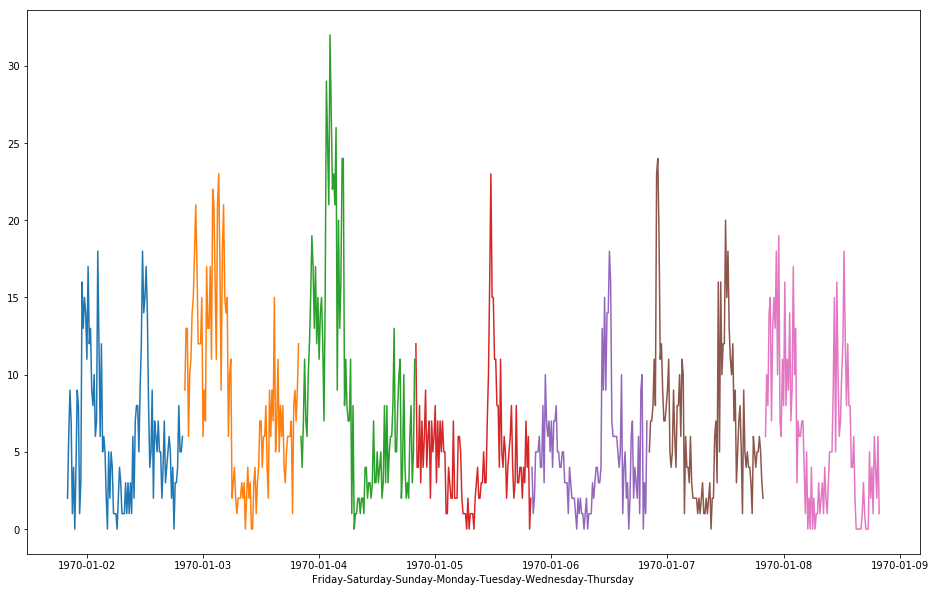

In [39]:
plt.figure(figsize=(16,10))
plt.plot(counts['counts'][:96])
plt.plot(counts['counts'][97:192])
plt.plot(counts['counts'][193:288])
plt.plot(counts['counts'][288:384])
plt.plot(counts['counts'][384:480])
plt.plot(counts['counts'][481:576])
plt.plot(counts['counts'][577:672])
plt.xlabel("Friday-Saturday-Sunday-Monday-Tuesday-Wednesday-Thursday")
plt.show()

Here is a plot of the first seven days of data broken apart by the color for each day. Based off of this visualization, it looks like there is a peak in the morning and a peak in the evening for logins of users. The logins tend to increase in the evening towards the end of the week and the weekend. The logins are more frequent in the morning and decrease slightly over the week. 

In [40]:

import numpy as np

res = np.fft.fft(counts['counts'])/len(counts['counts'])

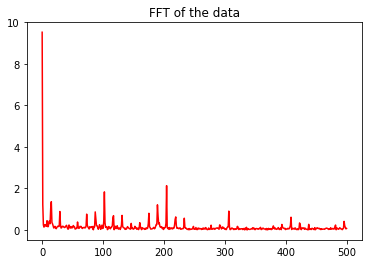

In [42]:
plt.plot(abs(res[:500]), 'r')
plt.title('FFT of the data')
plt.show()

Since this seems like an FFT would provide a lot of insight into, I attempted to create a plot of the frequency content of the data.  

__Part 2 - Experiment and Metrics Design__

The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on 
weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active 
during   the   day.   On   weekends,   there   is   reasonable   activity   in   both   cities. 
 
However,   a   toll   bridge,   with   a   two ­way   toll,   between   the   two   cities   causes   driver   partners   to   tend 
to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have 
proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by 
reimbursing   all   toll   costs. 

__What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in 
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric? __

The number of reimbursements that are issued to driver partners to serve both cities. The frequency of the reimbursements and to which driver partners are residents of each city. 

Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the 
proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on:  

a. how   you   will   implement   the   experiment 

b. what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the 
observation 

c. how   you   would   interpret   the   results   and   provide   recommendations   to   the   city 
operations   team   along   with   any   caveats. 

__ANSWER__
I would begin by tracking the number of partner drivers that serve both cities. Ideally, I could collect data over an entire month and have the number of trips partner drivers make and the locations that they serve. It would be good to have a control to understand if any improvement can be made to encourage multi city service. 

Then I would perform the same data collection after the change and collect an equivalent data set to compare to the control. 

I am not sure what the size of the data set would be, but as long as the sample size is larger than 30, which I am assuming it would be, since these are such large cities. I would compare the statistical significance of the results. Is the change between the control and test significantly different? How high is the confidence interval? 

__PART 3__

In [43]:
with open('./ultimate_data_challenge.json') as h:
    use_data = json.load(h)
    
ulti_df = pd.DataFrame(use_data)
ulti_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [44]:
ulti_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [87]:
ulti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
active_user               50000 non-null bool
last_trip_date_secs       50000 non-null float64
signup_date_secs          50000 non-null float64
dtypes: bool(

In [47]:
#City and Phone columns have values that need to be converted to boolean values 
ulti_df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [50]:
#Convert the phone and city columns to booleans using "get_dummies"
ulti_df_c = pd.get_dummies(ulti_df_c, columns = ['phone'])
ulti_df_c = pd.get_dummies(ulti_df_c, columns = ['city'])

In [53]:
#convert the object values into timestamps
ulti_df_c['last_trip_date'] = pd.to_datetime(ulti_df_c['last_trip_date'])

In [54]:
#convert the object values into timestamps
ulti_df_c['signup_date'] = pd.to_datetime(ulti_df_c['signup_date'])

The data had a few features the needed to be cleaned(see the cells above). I will decide what to do about missing data. It is a low amount of data. I will probably drop it. 

In [86]:
ulti_df_c.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,active_user,last_trip_date_secs,signup_date_secs
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0,1,0,0,1,False,1.402963e+09,1.390608e+09
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1,0,0,1,0,False,1.399248e+09,1.390954e+09
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,1,0,0,0,1,False,1.389053e+09,1.388966e+09
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0,1,0,0,1,True,1.404000e+09,1.389312e+09
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,1,1,0,False,1.394842e+09,1.390781e+09
5,10.56,5.0,3.5,1.00,2014-06-06,2014-01-09,0.0,2,True,100.0,0,0,1,0,1,False,1.402013e+09,1.389226e+09
6,3.95,4.0,0.0,1.00,2014-01-25,2014-01-24,0.0,1,False,100.0,1,0,0,1,0,False,1.390608e+09,1.390522e+09
7,2.04,5.0,5.0,1.00,2014-01-29,2014-01-28,0.0,2,False,100.0,0,0,1,0,1,False,1.390954e+09,1.390867e+09
8,4.36,5.0,4.5,1.00,2014-02-01,2014-01-21,0.0,2,False,100.0,0,0,1,1,0,False,1.391213e+09,1.390262e+09
9,2.37,5.0,0.0,1.00,2014-01-05,2014-01-03,0.0,1,False,0.0,0,0,1,1,0,False,1.388880e+09,1.388707e+09


In [57]:
ulti_df_c['active_user'] = ulti_df_c.apply(lambda row: 
                    (row['signup_date']+pd.Timedelta('151D')<= row['last_trip_date']<=row['signup_date']+pd.Timedelta('181D')), axis=1)


In [85]:
ulti_df_c['last_trip_date_secs'] = pd.to_timedelta(ulti_df_c['last_trip_date']).dt.total_seconds()
ulti_df_c['signup_date_secs'] = pd.to_timedelta(ulti_df_c['signup_date']).dt.total_seconds()
ulti_df_c['avg_rating_by_driver'] = ulti_df_c['avg_rating_by_driver'].fillna(0)
ulti_df_c['avg_rating_of_driver'] = ulti_df_c['avg_rating_of_driver'].fillna(0)

In [59]:
ulti_df_c['active_user'].value_counts()

False    37802
True     12198
Name: active_user, dtype: int64

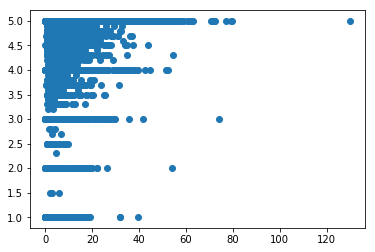

In [66]:
plt.scatter(ulti_df_c['avg_dist'], ulti_df_c['avg_rating_by_driver'])
plt.show()

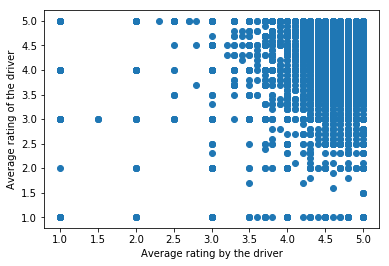

In [63]:
plt.scatter(ulti_df_c['avg_rating_by_driver'], ulti_df_c['avg_rating_of_driver'])
plt.xlabel('Average rating by the driver')
plt.ylabel('Average rating of the driver')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#break the data into X and Y and then split into training and test sets
temp = ulti_df_c.dropna(axis=0)
print(ulti_df_c.shape, '\n new data size: ', temp.shape)

X_data = temp.drop(['active_user', 'signup_date', 'last_trip_date', 'signup_date_secs', 'last_trip_date_secs'], axis=1)
y_data = temp['active_user']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.33, random_state = 42)

(50000, 18) 
 new data size:  (50000, 18)


In [97]:
ulti_df_c['active_user'].value_counts()

False    37802
True     12198
Name: active_user, dtype: int64

In [105]:
from sklearn.linear_model import LogisticRegression

lgreg = LogisticRegression()
model = lgreg.fit(X_data, y_data)


In [111]:
# Predict the labels of the test set: y_pred
y_pred = model.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8217 4272]
 [1241 2770]]
             precision    recall  f1-score   support

      False       0.87      0.66      0.75     12489
       True       0.39      0.69      0.50      4011

avg / total       0.75      0.67      0.69     16500



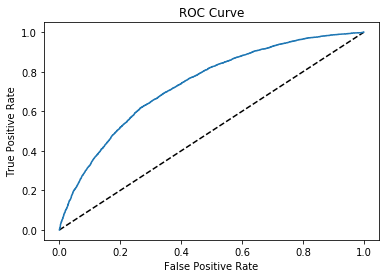

In [108]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [102]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 'minority')
x_sm, y_sm = sm.fit_sample(X_train, y_train)
unique_rsm, counts_rsm = np.unique(y_sm, return_counts=True)
dict(zip(unique_rsm, counts_rsm))

{False: 25313, True: 25313}

In [109]:
model_over = lgreg.fit(x_sm, y_sm)

In [112]:
# Predict the labels of the test set: y_pred
y_pred_over = model_over.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))

[[8217 4272]
 [1241 2770]]
             precision    recall  f1-score   support

      False       0.87      0.66      0.75     12489
       True       0.39      0.69      0.50      4011

avg / total       0.75      0.67      0.69     16500



In [113]:
print(model_over.coef_)

[[ -3.90448938e-02  -9.01968090e-03   1.54310533e-01  -1.01549115e-01
    4.08855641e-03   9.04480489e-02   7.26570208e-01  -6.09709789e-04
   -9.90789385e-01   3.75700822e-01  -4.10404411e-01  -2.38496781e-01
    9.03374473e-01]]


In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_sm, y_sm).score(x_sm, y_sm)

print(clf.score(x_sm, y_sm))
#print(clf.feature_importances_)

0.726563425908


Feature Ranking:
1. feature avg_dist (0.281848)
2. feature avg_rating_by_driver (0.268981)
3. feature avg_rating_of_driver (0.167563)
4. feature avg_surge (0.124436)
5. feature surge_pct (0.065265)
6. feature trips_in_first_30_days (0.046000)
7. feature ultimate_black_user (0.025523)
8. feature weekday_pct (0.012744)
9. feature city_Astapor (0.007639)
10. feature city_King's Landing (0.000000)
11. feature city_Winterfell (0.000000)
12. feature phone_Android (0.000000)
13. feature phone_iPhone (0.000000)


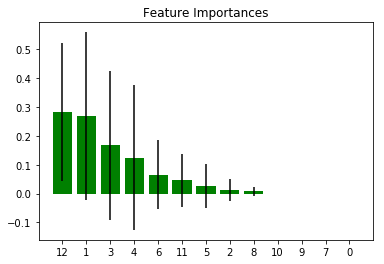

In [125]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature Ranking:")

for f in range(x_sm.shape[1]):
    print("%d. feature %s (%f)" % (f+1, X_data.columns[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_sm.shape[1]), importances[indices], color='g', yerr=std[indices], align="center")
plt.xticks(range(x_sm.shape[1]), indices)
plt.xlim([-1, x_sm.shape[1]])
plt.show()

In [126]:
# Predict the labels of the test set: y_pred
y_pred_rf = clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[8807 3682]
 [1424 2587]]
             precision    recall  f1-score   support

      False       0.86      0.71      0.78     12489
       True       0.41      0.64      0.50      4011

avg / total       0.75      0.69      0.71     16500



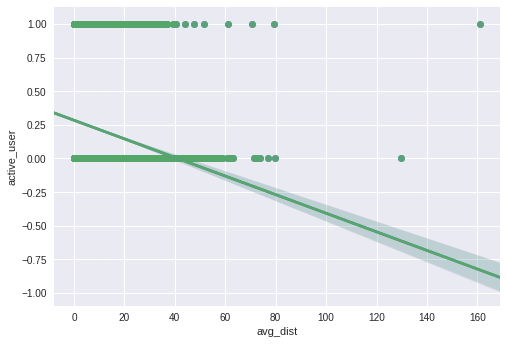

In [129]:
import seaborn as sns

sns.regplot(y=ulti_df_c['active_user'], x=ulti_df_c['avg_dist'], fit_reg = True)
plt.show()

__CONCLUSION:__

I used logistic regression and Random Forest models to predict a users's "active status". Both the models had very similar fit scores between .72 and .75. Since the data was imbalanced, I used SMOTE to balance the data, but I did not notice improvement in my fit score for the logistic regression model. Both models were much better at predicting an inactive user versus an active user. The recall scores show that the models had similar resuls for misclassification. 

The most important feature for predicting a user's "active status" was the avg_dist. Looking at the graph above, the active users  had a much lower avg_dist, meaning they were probably local, and if they live in a city, they likely rely on a service like this. 

Using the insights from this model, I would say Ulitmate could improve rider retention by creating a "bus route" for cars to serve users with a higher average distance, but also guarantee drivers get fares and do not have to drive far out. If location data could be gathered, that would be helpful for that goal. I would guess these riders are also most likely using the Ultimate service on weekends in the late evening/early morning. If a campaign to serve these riders was discussed with the drivers, it could be mutually beneficial. 